In [331]:
#Import

from dotenv import load_dotenv
import os 
import tweepy
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import re


In [332]:
#Step 3: Environment variables

load_dotenv()                    


consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')
access_token = os.environ.get('ACCESS_TOKEN')
access_token_secret = os.environ.get('ACCESS_TOKEN_SECRET')
bearer_token = os.environ.get('BEARER_TOKEN')

In [333]:
# Step 4: Innitialize the tweepy library
client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

In [334]:
#step 5: Start making requests to the API

query = '#100daysofcode (pandas OR python) -is:retweet'

tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)

In [335]:
# Step 6: Convert to pandas Dataframe

tweets_dict = tweets.json() #Save tweets as dictionary

In [336]:
data = tweets_dict['data'] #Extract "data" value from dictionary

In [337]:
df = pd.json_normalize(data) #Transform to pandas df

In [338]:
#Take a look at the dataframe to make sure is correct `df.head()`

df.head()

,author_id,created_at,text,lang,id
0,1366993886141288448,2022-06-29T00:30:09.000Z,The UK wants to boost AI development by removi...,en,1541942059921195013
1,1249156366897463296,2022-06-29T00:30:04.000Z,Grade A+ assured in any timed paper\n#Essay du...,en,1541942036621889537
2,1249156366897463296,2022-06-29T00:30:03.000Z,Grade A+ assured in any timed paper\n#Essay du...,en,1541942033291550720
3,1332714745871421443,2022-06-29T00:30:00.000Z,NEED a #JOB?\nSign up now https://t.co/o7lVlsC...,en,1541942021811621888
4,1528856711725031425,2022-06-29T00:28:03.000Z,https://t.co/9LAEL3AN8r \n\n#programming #intr...,en,1541941530495275008


In [339]:
#Save data to csv
df.to_csv("coding-tweets.csv")

In [340]:
#Step 7: Search for the words

#text analysis

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False


In [343]:
pandas = 0
python = 0

for index, row in df.iterrows():
    pandas += word_in_text('pandas', row['text'])
    python += word_in_text('python', row['text'])

print(f"The word python was mentioned {python} times")
print(f"The word pandas was mentioned {pandas} time")

The word python was mentioned 100 times
The word pandas was mentioned 1 time


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


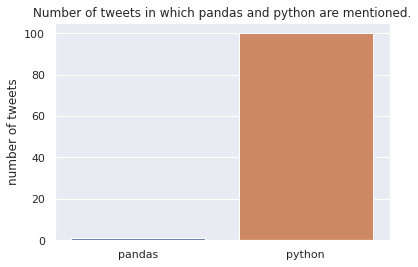

In [342]:
#Visualize data


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['pandas', 'python']

# Plot the bar chart
ax = sns.barplot(cd, [pandas, python])
ax.set(ylabel="number of tweets", title='Number of tweets in which pandas and python are mentioned.')

plt.show()